In [25]:
import torch
import torch.nn as nn
import pandas as pd
import cv2
import os
from pathlib import Path
import torchvision


In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# import data
img_path = "Dataset/train"
print("Number of cats images" , len(os.listdir(f"{img_path}/cats")) )
print("Number of dogs images" , len(os.listdir(f"{img_path}/dogs")) )

# show some data
for dirpath , dirname , filename in os.walk(img_path):
    print(f"There are {len(dirname)} dir and {len(filename)} images in '{dirpath}' ")

Number of cats images 10000
Number of dogs images 10000
There are 2 dir and 0 images in 'Dataset/train' 
There are 0 dir and 10000 images in 'Dataset/train\cats' 
There are 0 dir and 10000 images in 'Dataset/train\dogs' 


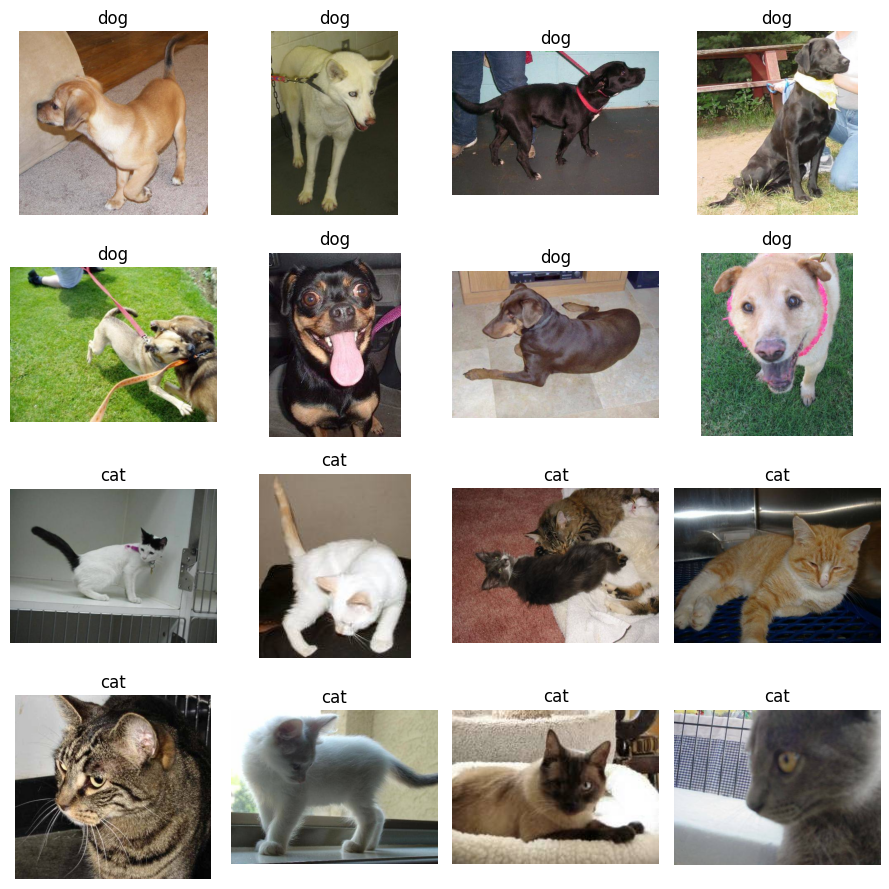

In [80]:
# Visulise some data
import matplotlib.pyplot as plt
import random


fig = plt.figure(figsize= ( 9 , 9))
col  , row = 4 , 4
dog_cls = random.sample(os.listdir(os.path.join(img_path , "dogs")) , k = row*2)
cat_cls = random.sample(os.listdir(os.path.join(img_path , "cats")) , k = row*2)

# combine 
img_cls = dog_cls+ cat_cls
for i in range(0 , row*col):
     
     img = cv2.imread(os.path.join(img_path , img_cls[i].split(".")[0] + "s" , img_cls[i]))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
     
     plt.subplot(row , col , i+1)
     plt.title(img_cls[i].split(".")[0])
     plt.imshow(img)
     plt.axis(False)
     plt.tight_layout()
     

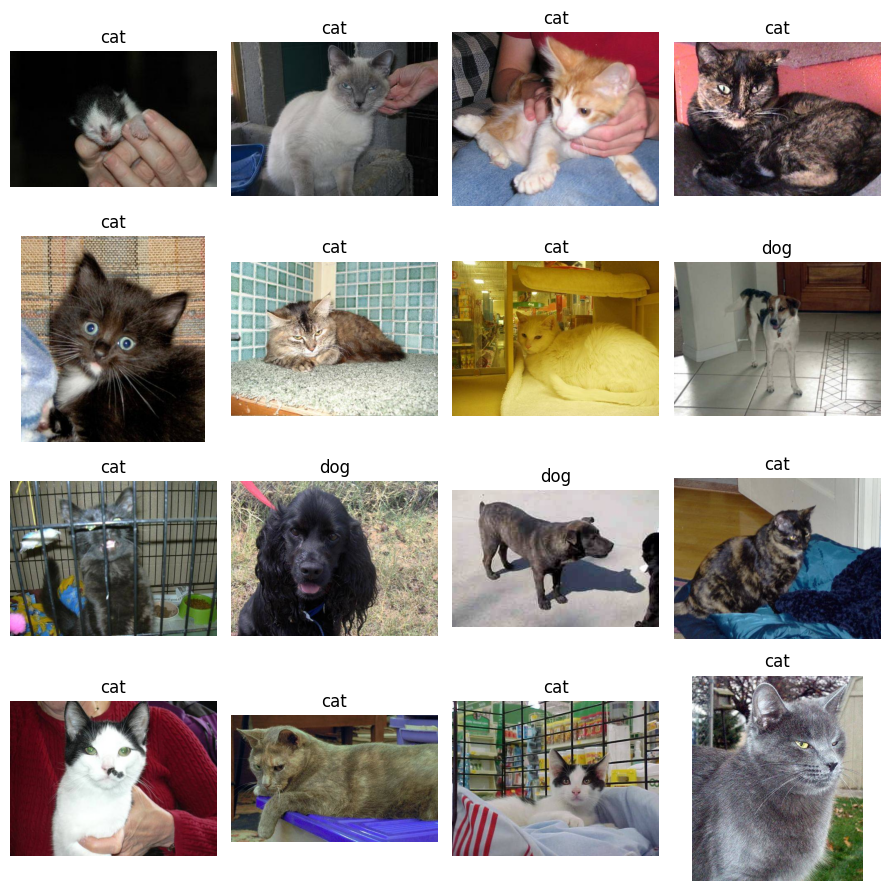

In [96]:
# Visulise some data
import matplotlib.pyplot as plt
import random

random.seed(42)


fig = plt.figure(figsize= ( 9 , 9))
col  , row = 4 , 4
import glob
 
img_cls = random.sample(list(glob.glob(img_path+ "*/*/*.jpg")) , k = row*col)
for i in range(0 , row*col):
     
     img = cv2.imread(img_cls[i])
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
     
     plt.subplot(row , col , i+1)
     plt.title(img_cls[i].split("\\")[3][:3])
     plt.imshow(img)
     plt.axis(False)
     plt.tight_layout()

In [97]:
# Importing the dataset
from torchvision import datasets , transforms
from PIL import Image


In [98]:
# transoform the image
data_transformer = transforms.Compose([
    transforms.Resize(size = (64 , 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

In [101]:
temp = torch.rand(32 , 3 , 32 , 32)
img = Image.open(img_cls[0])
out = data_transformer(img)

In [106]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [108]:
def transform_and_visualise_img(img_path , transform , n = 3):
    random.seed(42)
    fig = plt.figure(figsize=(10 , 10))
    random_path = random.sample(list(glob.glob(img_path+ "*/*/*.jpg")) , k = n)
    for img_ in random_path:
        img = Image.open(img_)
        
        
    

TypeError: 'JpegImageFile' object is not subscriptable